In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
import dill
import pickle as pkl
import sys
sys.path.append('../')

from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
from dynamic_env.traverser import DynamicObstacleTraverser


import itertools as it
import time
import imageio

from matplotlib import pyplot as plt


from sgr.substrates import morph_substrate, control_substrate
from sgr.generate_robot import generate_robot, eval_robot_constraint
from sgr.evogym_sim import simulate_env
from sgr.body_speciation import CustomGenome


In [2]:
def get_robot(genome, robot_size, neat_config):
    if genome.robot is not None:
        robot = genome.robot
    else:
        cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)
        design_substrate = morph_substrate(robot_size)
        design_net = create_phenotype_network(cppn, design_substrate)
        robot = generate_robot(design_net, robot_size)
        print(robot)

    if not eval_robot_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)

    
    env = DynamicObstacleTraverser(body=robot, connections=connections, filename="../dynamic_env/env.json")
    img = env.render(mode='img')
    env.close()
    return robot, img

In [4]:
# STEPS = 400
# ROBOT_SIZE = 5
# POP = 48

# directory = "results/" + ENV

# params = {"robot_size": ROBOT_SIZE, "env": "dynamic", "steps": STEPS, "pop_size": POP}

# morphology_coords = morph_substrate(ROBOT_SIZE)
# CustomGenome.robot_func = lambda self, net, params: generate_robot(net, ROBOT_SIZE)
# CustomGenome.substrate = morphology_coords
# CustomGenome.robot_size = ROBOT_SIZE


# neat_config = neat.config.Config(
#     CustomGenome,
#     neat.reproduction.DefaultReproduction, 
#     neat.species.DefaultSpeciesSet, 
#     neat.stagnation.DefaultStagnation, 
#     "../neat_configs/POET.cfg"
# )

# input_size = morphology_coords.dimensions*2 + 1 # two coordinates plus the bias
# neat_config.genome_config.num_inputs = input_size
# neat_config.genome_config.input_keys = [-1*i for i in range(1, input_size+1)]
# neat_config.genome_config.num_outputs = 1
# neat_config.genome_config.output_keys = [1]

with open(f"../poet/cp_5_3D_gen_225.pkl", "rb") as file:
    poet_pop = pkl.load(file)
    
CustomGenome.robot_func = lambda self, net, config: generate_robot(net, poet_pop.run_params.robot_size)
CustomGenome.substrate = morph_substrate(poet_pop.run_params.robot_size)
CustomGenome.robot_size = poet_pop.run_params.robot_size
CustomGenome.spec_genotype_weight = poet_pop.run_params.spec_genotype_weight
CustomGenome.spec_phenotype_weight = poet_pop.run_params.spec_phenotype_weight



###################### Pair (env: 0, pop: 91) ########################

7880 4.270455705818105


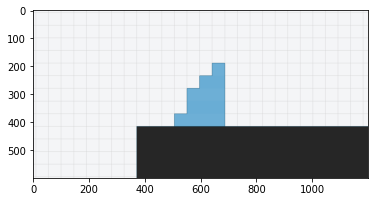

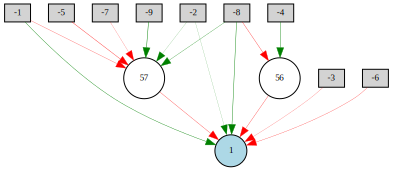

7632 3.675629896523023


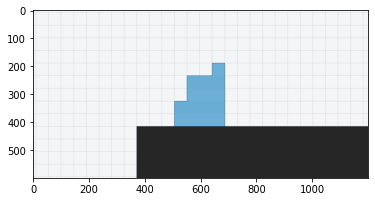

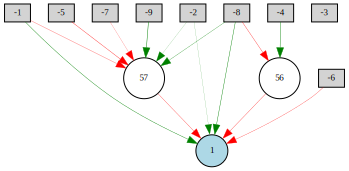



###################### Pair (env: 10, pop: 21) ########################

7558 3.2731171936735777


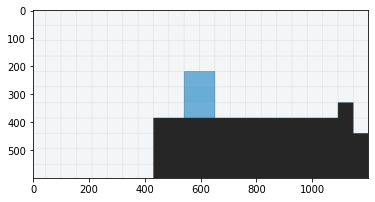

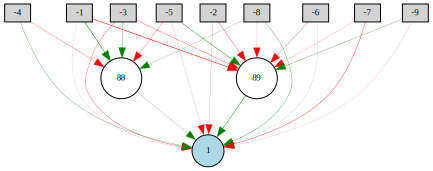

8024 3.286475107770164


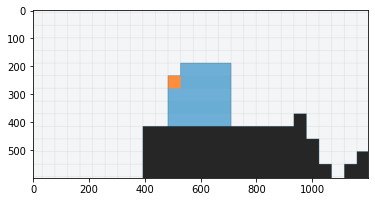

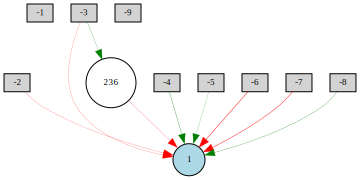



###################### Pair (env: 12, pop: 21) ########################



###################### Pair (env: 15, pop: 15) ########################



###################### Pair (env: 16, pop: 16) ########################



###################### Pair (env: 40, pop: 116) ########################



###################### Pair (env: 24, pop: 40) ########################

9467 3.8859163097099914


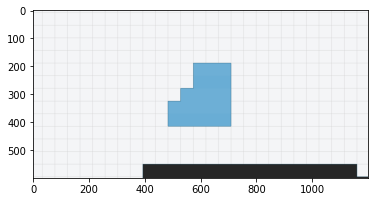

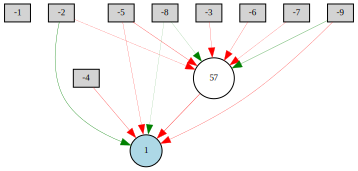

9515 3.7670369986147803


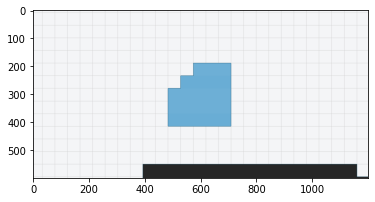

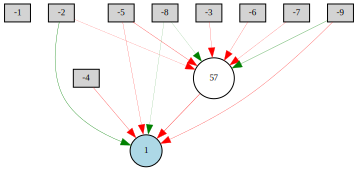



###################### Pair (env: 35, pop: 91) ########################



###################### Pair (env: 21, pop: 21) ########################



###################### Pair (env: 50, pop: 116) ########################



###################### Pair (env: 72, pop: 116) ########################



###################### Pair (env: 77, pop: 469) ########################



###################### Pair (env: 71, pop: 405) ########################



###################### Pair (env: 70, pop: 395) ########################



In [12]:
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    print(f"\n\n###################### Pair (env: {env.id}, pop: {pop.id}) ########################\n")
    env.generate_json("env.json")
    for ag_id, ag in pop.pop.population.items():
        if ag.fitness is not None and ag.fitness > 3:
            r, img = get_robot(ag, pop.robot_size, pop.neat_config)
            if img is not None:
                print(ag.key, ag.fitness)
                plt.imshow(img)
                plt.show()
                net = neat.nn.FeedForwardNetwork.create(ag, pop.neat_config)
                display(draw_net(net))

In [6]:
STEPS = 400
env_dict = {}
ag_dict = {}
for p in poet_pop.pairs:
    pop = p.agent_pop
    env = p.environment
    for ag_id, ag in pop.pop.population.items():
        ag_dict[ag_id] = (ag, pop)
    env_dict[env.id] = env



In [7]:
def show_exec(ag_id, env_id):
    env_dict[env_id].generate_json("env.json")
    ag, pop = ag_dict[ag_id]
    reward, done = pop.single_genome_fit(ag, STEPS, "dynamic", True, None)
    return reward, done

In [15]:
r, d = show_exec(9515, 71)
print(r)

0.3044036150275169


In [8]:
env1 = poet_pop.mutate(env_dict[195])
env2 = poet_pop.mutate(env_dict[195])

print(env1.obstacle_prob, env2.obstacle_prob)

[0.32 0.41 0.27] [0.3  0.38 0.32]


In [10]:
# poet_pop.create_environments()